In [1]:
from sklearn.cluster import KMeans

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
%matplotlib inline

In [5]:
from sklearn.feature_extraction import image

In [6]:
from sklearn.cluster import spectral_clustering

In [7]:
import scipy as sp

In [8]:
from skimage import transform

In [9]:
original_pic =plt.imread('me.jpg')

Text(0.5, 1.0, ' Original Picture')

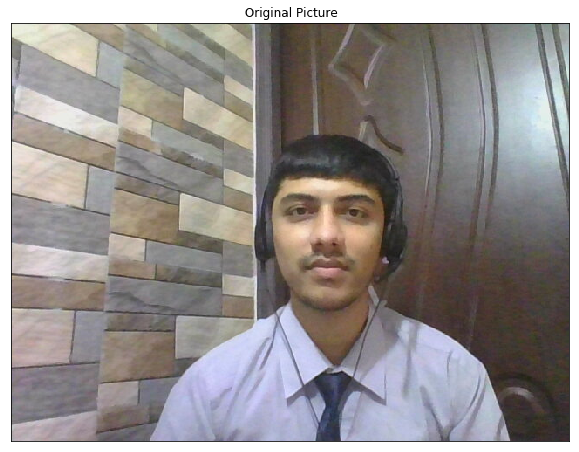

In [10]:
plt.figure(figsize=(10,10))
plt.imshow(original_pic)
plt.xticks(())
plt.yticks(())
plt.title(" Original Picture")

In [11]:
def rgb2gray(rgb):

    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b

    return gray

Text(0.5, 1.0, ' Original Picture')

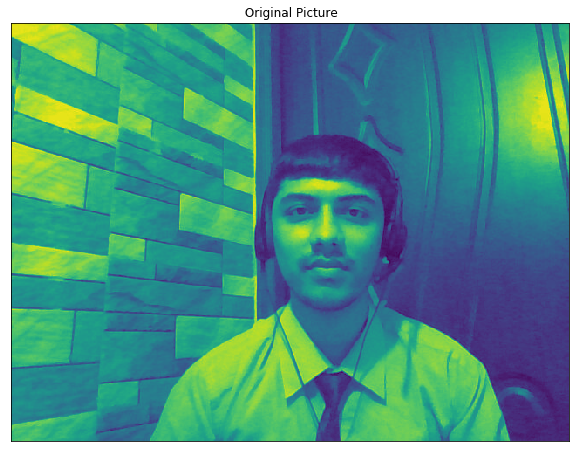

In [12]:
gray_imag =rgb2gray(original_pic)
plt.figure(figsize=(10,10))
plt.imshow(gray_imag)
plt.xticks(())
plt.yticks(())
plt.title(" Original Picture")

In [13]:
gray_imag.shape

(480, 640)

In [14]:
fig =plt.figure()
def cluster_image(img,g_img,stop,step):
    # Resize the original size to speed up the processing
    g_img = g_img[::2, ::2] + g_img[1::2, ::2] + g_img[::2, 1::2] + g_img[1::2, 1::2]
    g_img = g_img[::2, ::2] + g_img[1::2, ::2] + g_img[::2, 1::2] + g_img[1::2, 1::2]
        
    # Convert the image into a graph with the value of the gradient on the edges.
    graph = image.img_to_graph(g_img/255)
        
    # Take a decreasing function of the gradient: an exponential
    # The smaller beta is, the more independent the segmentation is of the
    # actual image. For beta=1, the segmentation is close to a voronoi
    beta = 5
    eps = 1e-6
    graph.data = np.exp(-beta * graph.data / graph.data.std()) + eps
    
    original_img =img
    ln,wd,ht =img.shape
    img=np.float64(img/255)
    
    resize_img = img.reshape(ln*wd,ht) 
    for i in range(1,stop,step):
        kmeans = KMeans(n_clusters=i, random_state=0).fit(resize_img)
        pic2show =kmeans.cluster_centers_[kmeans.labels_]
        pic2show=pic2show.reshape(ln,wd,ht)
        
        #applying spectral_clustering
        seg2show = spectral_clustering(graph, n_clusters=10,assign_labels='kmeans',random_state=20)
        seg2show = seg2show.reshape(g_img.shape)
        
        fig.add_subplot(2,1,1)
        plt.title(' K-Means : %s' %i)
        plt.imshow(pic2show)
        plt.xticks(())
        plt.yticks(())
        plt.show()
        
        fig.add_subplot(2,1,2)
        plt.title(' K-Means : %s , Kmeans clustering plot' %i)
        plt.imshow(g_img,cmap=plt.cm.gray)
        for l in range(i):
            plt.contour(seg2show == l, contours=1, cmap =plt.cm.get_cmap("Spectral"))
        plt.xticks(())
        plt.yticks(())
        plt.show()

        
        

<Figure size 432x288 with 0 Axes>

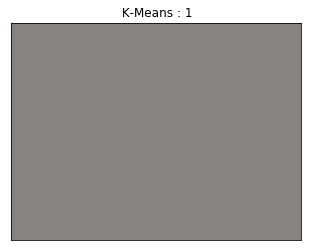

/home/anish/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'contours'
  s)


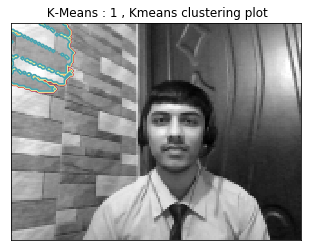

/home/anish/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


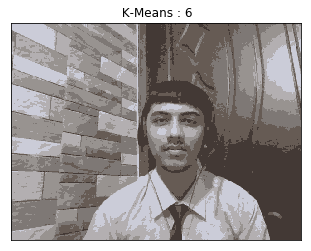

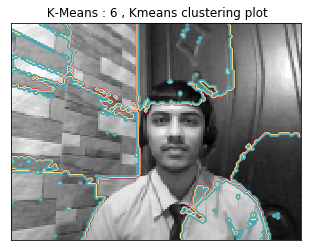

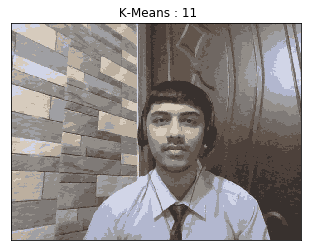

/home/anish/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:1243: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


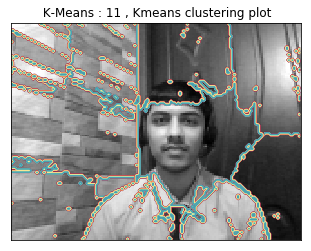

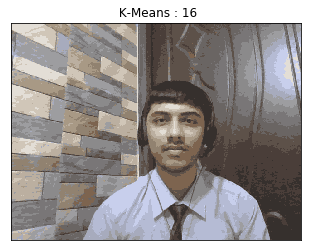

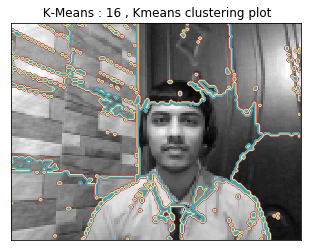

In [15]:
cluster_image(original_pic,gray_imag,20,5)

# Summary

1. Importing the original picture and converting it to  converting the RGB channels into a  2D Matrix with single    channel.
2. Compressing the gray scale image to for a faster computation.
3.  From  here we can summarize that when K  is small ,it started clustering the shades and as we move further it     start detecting the edges and the contrast between the colours.
